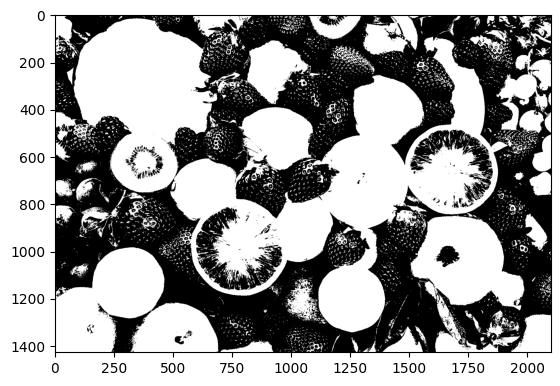

In [1]:
# 2.1. Phân vùng theo histogram
# 2.1.1. Phương pháp Otsu

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than theshold are kept
b = a > thres
b = Image.fromarray(b)

plt.imshow(b)
plt.show()

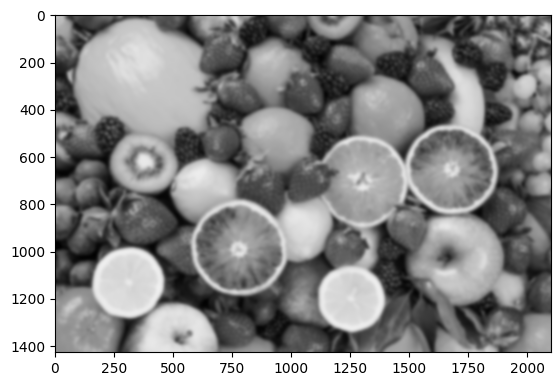

In [2]:
# 2.1.2. Phương pháp Adaptive Thresholding

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


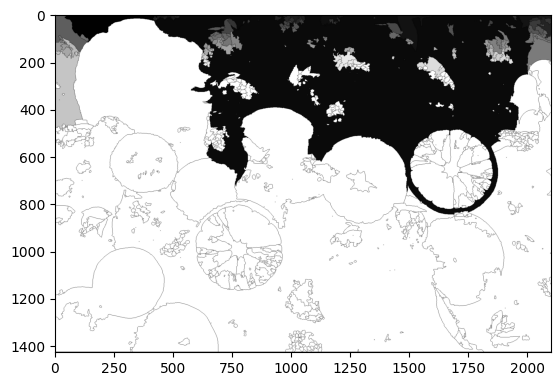

In [7]:
# 2.2. Phân vùng theo region

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from scipy.ndimage import label # Import the label function


# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')

# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations=2)

# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)

# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# performing labeling
labelled_img, ncc = label(dt) # Use the correct function name 'label' and store the result in labelled_img

# labelled_img is converted to 32-bit integer
labelled_img = labelled_img.astype(np.int32)

# performing watershed
cv2.watershed(data, labelled_img) # Use labelled_img in watershed
b = Image.fromarray(labelled_img)

plt.imshow(b)
plt.show()

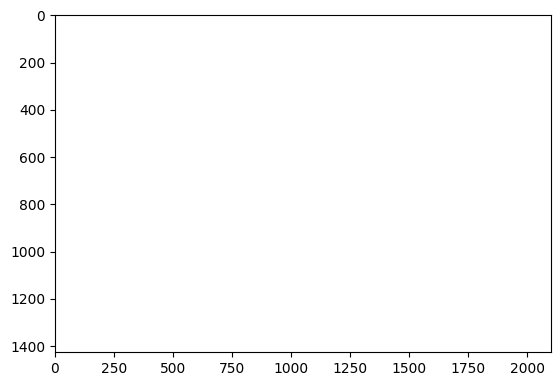

In [13]:
# 2.3. Biến đổi đối tượng trong ảnh
# 2.3.1. Sử dụng binary_dilation

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from scipy.ndimage import label

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()

plt.imshow(c)
plt.show()


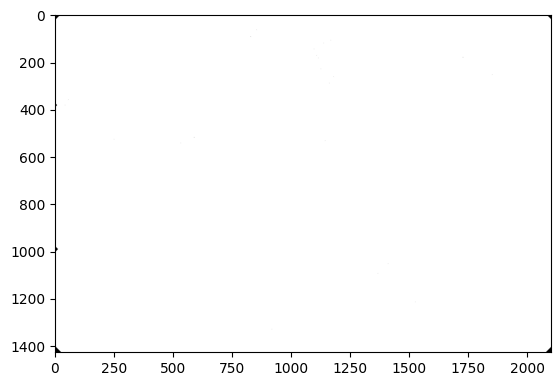

In [14]:
# 2.3.2. Sử dụng binary_opening

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from scipy.ndimage import label

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

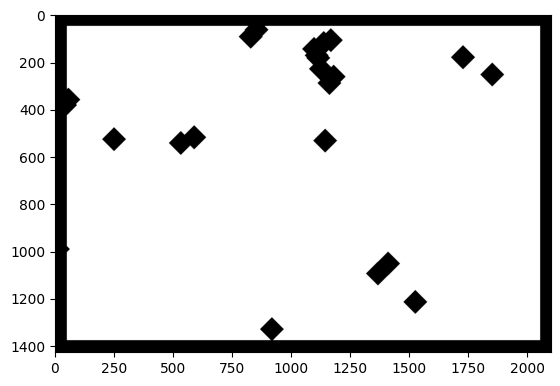

In [15]:
# 2.3.3. Sử dụng binary_erosion

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from scipy.ndimage import label

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

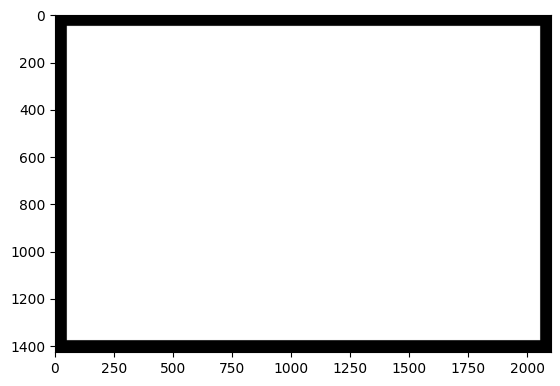

In [16]:
# 2.3.4. Sử dụng binary_closing

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from scipy.ndimage import label

# opening the image and converting it to grayscale
data = Image.open('fruit.jpg').convert('L')

# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()